#**Integrantes del Grupo 5**

##Alexander Castillo Díaz        C.C. 1032377957
##Fabio Andrés Parrado Velasquez C.C. 79899809
##Sergio José Sotelo González    C.C. 1020845392



**URL **

https://github.com/parradoandres/grupo5_guia3.git

# **Guía 3**

## **¿Cómo podemos controlar el creciente número de accidentes en Nueva York?**

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (accidente) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado **`,`**.

Realizará las siguientes tareas con los datos:

1. Leer, transformar y preparar datos para su visualización
2. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Overview de la data

Analizemos las columnas presentes en el data frame

Este conjunto de datos contiene información detallada sobre accidentes de tránsito registrados en la ciudad de Nueva York. A continuación, se presenta la descripción de cada columna:

- **BOROUGH**. Municipio donde ocurrió el accidente (ejemplo: Manhattan, Brooklyn, Queens, Bronx, Staten Island).
- **COLLISION_ID** Identificador único asignado a cada colisión para diferenciar los accidentes registrados.
- **CONTRIBUTING FACTOR VEHICLE** (1, 2, 3, 4, 5) Factores que contribuyeron a la ocurrencia del accidente, como exceso de velocidad, distracción del conductor, fallas mecánicas, malas condiciones climáticas, entre otros.
Se pueden registrar hasta cinco factores por accidente, cada uno correspondiente a un vehículo involucrado.
- **CROSS STREET NAME**  Nombre de la calle transversal más cercana al lugar del accidente, útil para ubicar intersecciones peligrosas.
- **DATE** Fecha exacta en la que ocurrió el accidente en formato YYYY-MM-DD.
- **TIME** Hora del accidente en formato HH:MM AM/PM, permitiendo analizar patrones horarios en la siniestralidad.
- **LATITUDE y LONGITUDE**

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED** Número de personas heridas en el accidente, clasificadas en tres categorías: Ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS** Número de víctimas fatales en el accidente, categorizadas en: ciclistas, Motociclistas - conductores de vehículos y Peatones.

- **ON STREET NAME**  Nombre de la calle donde ocurrió el accidente, información clave para el análisis de zonas de alto riesgo.

- **VEHICLE TYPE CODE (1, 2, 3, 4, 5)** Tipos de vehículos involucrados en el accidente, pudiendo haber hasta cinco vehículos registrados por accidente.
Sedán, SUV, Camión, Motocicleta, Autobús, Bicicleta, etc.

- **ZIP CODE**  Código postal correspondiente a la ubicación del accidente, útil para agrupar eventos por áreas específicas dentro de la ciudad.

### **Limpieza del dataset**

Para asegurar que los datos sean consistentes y puedan ser analizados correctamente, realizaremos la imputación de los valores faltantes en las columnas que presentan datos nulos. A continuación, se detallan los pasos que debes seguir para limpiar el conjunto de datos.
- **Paso 1: Identificar los valores faltantes**
- **Paso 2: Decidir el método de imputación**

Dado el análisis de valores nulos, se aplicarán diferentes estrategias de imputación según el tipo de dato. Por ejemplo: para la columna ZIP CODE, se imputará con el código postal más frecuente (moda) dentro de cada municipio registrado en BOROUGH. En el caso de las coordenadas LATITUDE y LONGITUDE, se reemplazarán los valores faltantes con la media de las coordenadas dentro de cada municipio. La columna ON STREET NAME será rellenada con "UNKNOWN" en caso de estar vacía. Para los factores que contribuyeron al accidente (CONTRIBUTING FACTOR VEHICLE X), los valores nulos serán sustituidos por "Unspecified". Finalmente, en las columnas de VEHICLE TYPE CODE X, los valores ausentes se reemplazarán con "Unknown" para asegurar la integridad del análisis.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

os.getcwd()  # Devuelve el directorio de trabajo actual
os.makedirs('Datos', exist_ok=True)  # Crea un nuevo directorio
os.path.exists('/content/Datos/accidents-1.csv')  # Devuelve True si el archivo o directorio existe

True

In [ ]:
#Creación del Dataframe a partir del archivo CSV
# IMPORTANTE Subir el archivo telecom_churn.csv al directorio /content/Dato
df_acc = pd.read_csv('/content/Datos/accidents-1.csv', delimiter=";")  # Lee un archivo CSV en un DataFrame

# Muestra las primeras (5) filas del DataFrame
df_acc.head(100)

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,07/05/2019,13:00,QUEENS,11354.0,40.765430,-73.827194,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4165172,Sedan,NaN,NaN,NaN,NaN
96,07/05/2019,17:39,QUEENS,11358.0,40.753895,-73.798270,46 AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,4165062,Sedan,NaN,NaN,NaN,NaN
97,08/12/2018,14:45,BROOKLYN,11220.0,40.634890,-74.022285,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,3960269,Sedan,Sedan,NaN,NaN,NaN
98,07/04/2019,16:00,BROOKLYN,11239.0,NaN,NaN,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4164791,Sedan,Sedan,NaN,NaN,NaN


In [ ]:
# Retorna el número de filas y columnas del DataFrame
df_acc.shape

(238522, 24)

In [ ]:
# describe el contenido del dataframe
df_acc.describe(include='all')

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
count,238522,238522,238522,238452.000000,231544.000000,231544.000000,153918,238522.000000,238522.000000,238522.000000,...,198514,13072,2856,792,2.385220e+05,236801,182932,12301,2716,753
unique,601,1440,5,NaN,NaN,NaN,5221,NaN,NaN,NaN,...,54,31,9,6,NaN,447,459,84,38,21
top,11/15/2018,0:00,BROOKLYN,NaN,NaN,NaN,ATLANTIC AVENUE,NaN,NaN,NaN,...,Unspecified,Unspecified,Unspecified,Unspecified,NaN,Sedan,Sedan,Sedan,Sedan,Sedan
freq,708,3657,76253,NaN,NaN,NaN,1797,NaN,NaN,NaN,...,164775,12522,2784,776,NaN,86879,62540,4966,1187,310
mean,NaN,NaN,NaN,10865.578838,40.656873,-73.797699,NaN,0.054523,0.000532,0.023482,...,NaN,NaN,NaN,NaN,4.008044e+06,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,546.056571,1.632850,2.961521,NaN,0.237834,0.023250,0.152835,...,NaN,NaN,NaN,NaN,1.084693e+05,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,10000.000000,0.000000,-74.253930,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,3.511951e+06,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,10452.000000,40.666750,-73.973860,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,3.913739e+06,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,11208.000000,40.717007,-73.922770,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,4.006476e+06,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,11354.000000,40.765715,-73.864890,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,4.102648e+06,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Muestra información general del DataFrame
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

In [ ]:
#muestra los valores encontrados en nulo en las diderentes columnas
null_counts = df_acc.isnull().sum()  # Cuenta los valores nulos en cada columna
print(null_counts)

DATE                                  0
TIME                                  0
BOROUGH                               0
ZIP CODE                             70
LATITUDE                           6978
LONGITUDE                          6978
ON STREET NAME                    84604
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1       884
CONTRIBUTING FACTOR VEHICLE 2     40008
CONTRIBUTING FACTOR VEHICLE 3    225450
CONTRIBUTING FACTOR VEHICLE 4    235666
CONTRIBUTING FACTOR VEHICLE 5    237730
COLLISION_ID                          0
VEHICLE TYPE CODE 1                1721
VEHICLE TYPE CODE 2               55590
VEHICLE TYPE CODE 3              226221
VEHICLE TYPE CODE 4              235806
VEHICLE TYPE CODE 5              237769
dtype: int64


In [ ]:
def encontrarValoresFaltantesIterrows(df):
    """
    Identifica filas con valores faltantes recorriendo con iterrows().
    """
    filasConNulos = []

    for index, fila in df.iterrows():
        for valor in fila:
            if valor != valor:  # En Python, NaN no es igual a sí mismo
                filasConNulos.append(index)
                break  # Pasar a la siguiente fila si se encuentra un NaN

    return df.loc[filasConNulos]


print("Resultados con dfEjemplo1:")
print(encontrarValoresFaltantesIterrows(df_acc))

#print("\nResultados con dfEjemplo2:")
#print(encontrarValoresFaltantesIterrows(dfEjemplo2))

Resultados con dfEjemplo1:
              DATE   TIME   BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
0       09/26/2018  12:12     BRONX   10454.0  40.808987 -73.911316   
1       09/25/2018  16:30  BROOKLYN   11236.0  40.636005 -73.912510   
2       08/22/2019  19:30    QUEENS   11101.0  40.755490 -73.939530   
3       09/23/2018  13:10    QUEENS   11367.0        NaN        NaN   
4       08/20/2019  22:40     BRONX   10468.0  40.868336 -73.901270   
...            ...    ...       ...       ...        ...        ...   
238517  01/20/2018  15:00    QUEENS   11436.0  40.685356 -73.797230   
238518  01/04/2018  14:00     BRONX   10452.0  40.845180 -73.914170   
238519  01/20/2018  13:05     BRONX   10462.0  40.831210 -73.850876   
238520  01/29/2018  17:45    QUEENS   11377.0  40.757250 -73.904854   
238521  01/23/2018  16:38  BROOKLYN   11211.0  40.710197 -73.958430   

                          ON STREET NAME  NUMBER OF PEDESTRIANS INJURED  \
0                                    NaN     

**DEPURACIONES**

In [ ]:
# imputación de los valores nulos
import pandas as pd
def imputacion_valores_nulos(df, columna,valor_reemplazo):
  df[columna] = df[columna].fillna(valor_reemplazo)
  return df

# Imputación de datos nulos sobre ZIP CODE

# Definimos un nuevo dataframe de trabajo df y dejamos el inicial como línea base
df = pd.DataFrame(df_acc)

# Calcular la moda de la columna 'ZIP CODE' agrupada por la columna 'BOROUGH'
mode_borough = df.groupby('BOROUGH')['ZIP CODE'].agg(pd.Series.mode).reset_index()
# Trabajamos con el nuevo dataframe 'df' a partir de las columnas 'BOROUGH' and 'ZIP CODE' y se hace el join para obtener la nueva columna con la que llenaremos los valores nulos para el Zip Code
df = pd.merge(df, mode_borough, on='BOROUGH', how='left', suffixes=('', '_mode'))
# Reemplazamos los valores nulos en la columna 'ZIP CODE' con el nuevo zip code para su municipio
df['ZIP CODE'] = df['ZIP CODE'].fillna(df['ZIP CODE_mode'])


# Imputación de los valores nulos con valores fijos en la columnas
df = imputacion_valores_nulos(df, "ON STREET NAME", "UNKNOWN")
df = imputacion_valores_nulos(df, "CONTRIBUTING FACTOR VEHICLE 1", "Unspecified")
df = imputacion_valores_nulos(df, "CONTRIBUTING FACTOR VEHICLE 2", "Unspecified")
df = imputacion_valores_nulos(df, "CONTRIBUTING FACTOR VEHICLE 3", "Unspecified")
df = imputacion_valores_nulos(df, "CONTRIBUTING FACTOR VEHICLE 4", "Unspecified")
df = imputacion_valores_nulos(df, "CONTRIBUTING FACTOR VEHICLE 5", "Unspecified")
df = imputacion_valores_nulos(df, "VEHICLE TYPE CODE 1", "Unknown")
df = imputacion_valores_nulos(df, "VEHICLE TYPE CODE 2", "Unknown")
df = imputacion_valores_nulos(df, "VEHICLE TYPE CODE 3", "Unknown")
df = imputacion_valores_nulos(df, "VEHICLE TYPE CODE 4", "Unknown")
df = imputacion_valores_nulos(df, "VEHICLE TYPE CODE 5", "Unknown")

# Imputación de valores nulos en coordenadas con el promedio de cada municipio
null_coordenadas = df.groupby(['BOROUGH'])[['LONGITUDE']].mean().reset_index()
df = pd.merge(df, null_coordenadas, on='BOROUGH', how='left', suffixes=('', '_mean'))
df.loc[df['LONGITUDE'].isnull(), 'LONGITUDE'] = df['LONGITUDE_mean']
null_coordenadas = df.groupby(['BOROUGH'])[['LATITUDE']].mean().reset_index()
df = pd.merge(df, null_coordenadas, on='BOROUGH', how='left', suffixes=('', '_mean'))
df.loc[df['LATITUDE'].isnull(), 'LATITUDE'] = df['LATITUDE_mean']

# Se eliminan columna temporales
df = df.drop(columns=['LONGITUDE_mean', 'LATITUDE_mean', 'ZIP CODE_mode'])

# Cuenta los valores nulos en cada columna
null_counts = df.isnull().sum()
print(null_counts)

# Encontrar valores nulos en el dataframe original para comparar resultados obtenidos
#null_zip_codes = df_acc[df_acc['ZIP CODE'].isnull()]
#null_zip_codes

# Cuenta de valores nulos para columnas específicas
#null_counts = df[['ZIP CODE', 'LATITUDE', 'LONGITUDE']].isnull().sum()
#null_counts

DATE                             0
TIME                             0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
ON STREET NAME                   0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
dtype: int64


In [ ]:
# mostramos los valores actualizados
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3988123,Sedan,Unknown,Unknown,Unknown,Unknown
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3987962,Sedan,Unknown,Unknown,Unknown,Unknown
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4193132,Sedan,Unknown,Unknown,Unknown,Unknown
3,09/23/2018,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Unspecified,Unspecified,Unspecified,Unspecified,3985962,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,UNKNOWN,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,4192111,Sedan,Sedan,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unknown,Unknown,Unknown
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3822315,SPORT UTILITY / STATION WAGON,Unknown,Unknown,Unknown,Unknown
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,Unknown,Unknown,Unknown
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,Unspecified,Unspecified,Unspecified,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unknown,Unknown,Unknown


### Ejercicio 1

Desde 2014, la ciudad de Nueva York ha estado implementando el programa de seguridad vial Vision Zero, cuyo objetivo es reducir a cero el número de muertes por accidentes de tránsito para el año 2024. Como parte de esta iniciativa, se han implementado y mejorado diversas estrategias para aumentar la seguridad en las calles.

A continuación, se presentan algunas de las medidas adoptadas en el plan:

- [X] Detección automatizada de peatones para mejorar la seguridad en los cruces.
- [X] Auditorías de seguridad vial en zonas con alta incidencia de accidentes.
- [X] Expansión de la red de carriles para bicicletas para reducir la exposición de ciclistas a incidentes con vehículos.
- [X] Programas de educación y sensibilización para fomentar el respeto a las normas de tránsito.
- [X] Construcción de islas de refugio peatonal para mejorar la seguridad en calles de alto tráfico.
- [X] Implementación de reductores de velocidad inteligentes, como topes y amortiguadores, basados en el análisis de datos.


**Pregunta: ¿Cuáles de estas iniciativas podrían beneficiarse directamente del análisis de los datos disponibles sobre accidentes? Marque todas las opciones que considere aplicables.**

**Respuesta:**

Definitivamente el poder contar con los datos correctos y lo mas granular posible puede ayudar a la generación de iniciativas que se puedan convertir en proyectos e implementaciones de diferentes controles, políticas y acciones que conlleven a mejorar la seguridad vial, haciendolo de una forma mucho mas inteligente y de acuerdo a las carácterísticas propias del área analizada.

Instrucciones: Para marcar una opción, agregue una "[x]" en la casilla correspondiente.

### **Sigamos adelante y respondamos a cada una de las preguntas del cliente.**

### Ejercicio 2:

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238522 non-null  float64
 4   LATITUDE                       238522 non-null  float64
 5   LONGITUDE                      238522 non-null  float64
 6   ON STREET NAME                 238522 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

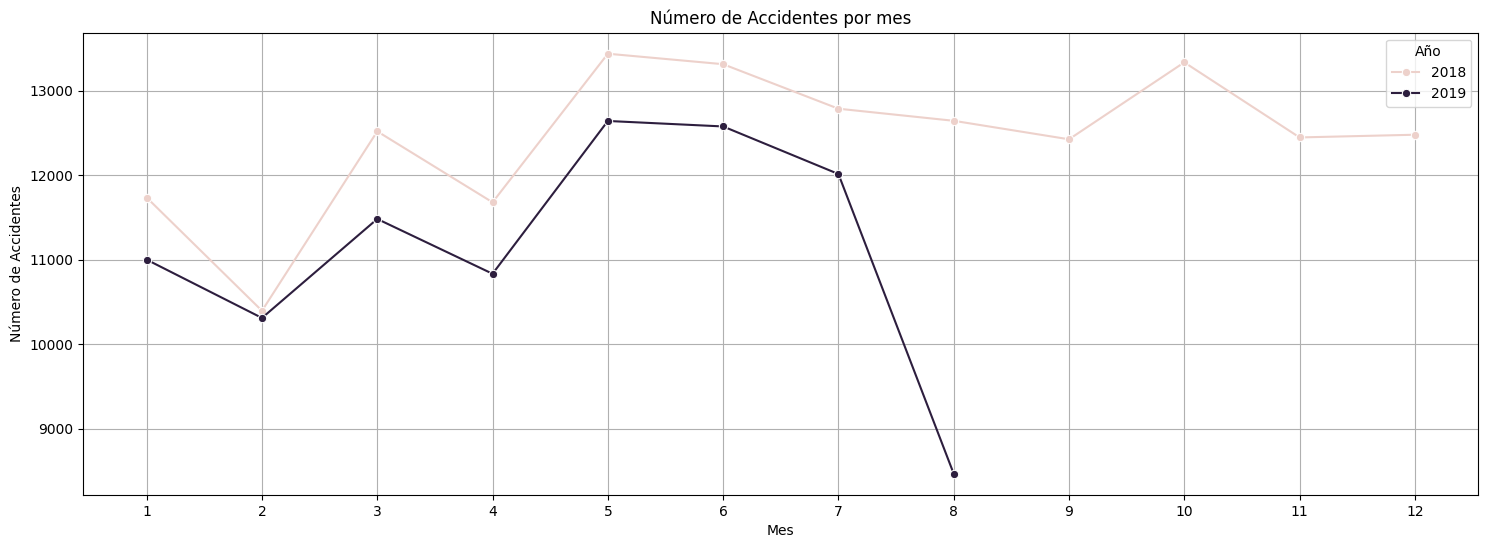

In [ ]:
# Solución Propuesta

# Se convierte la fecha en fecha
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract the year and month
df['Año'] = df['DATE'].dt.year
df['Mes'] = df['DATE'].dt.month

# Group by year and month and count the number of accidents
accidents_per_month = df.groupby(['Año', 'Mes'])['COLLISION_ID'].count().reset_index()

# Creación del Gráfico
plt.figure(figsize=(18, 6))
sns.lineplot(x='Mes', y='COLLISION_ID', hue='Año', data=accidents_per_month, marker='o')
plt.title('Número de Accidentes por mes')
plt.xlabel('Meses')
plt.ylabel('Número de Accidentes')
plt.xticks(range(1, 13))  # Se fija el eje x que representa los meses
plt.grid(True)
plt.show()

El gráfico de líneas que trazamos muestra claramente que no hay una tendencia alcista obvia en los accidentes a lo largo del tiempo.

**Para complementar,** podemos decir que de hecho el año 2019 se encuentra por debajo en cantidad de accidentes con respecto al 2018.

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**Los meses que parecen tener menor número de accidente**s de tránsito son: Febrero, Abril y Agosto-Septiembre.

**Las razones** que lo pudieran explicar son las siguientes:
1. Febrero. Suele ser de los meses donde las condiciones del clima por efecto del invierno recrudecen y ello desmotiva a los conductores a tomar sus carros para salir a realizar sus actividades.
2. Abril. Suelen ser vacaciones de Spring Break, por lo que puede existir desplazamiento de los conductores a otras localidades del país, o disminuir el uso de los vehículos.
3. Agosto-Septiembre. Suele ser verano en norteamérica, por lo que muchos ciudadanos toman períodos de vacaciones y ello pudiera ocasionar que baje la intensidad del tráfico, así como también, que se maneje en condiciones de menos stress.


### Ejercicio 3:
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

*Respuesta. * Evidenciamos en la gráfica que a medida que avanzan las horas del día va aumentando el número de accidentes. Esto atribuible a que en el día existe un numero mayor de vehículos en el territorio, usado por las personas para ealizar sus actividades diarias. Ya al finalizar la tarde y en horas de la noche, el número de accidentes vuelve a disminuir en la medida que merma la actividad en las calles.

Por otro lado, podemos ver que durante el día, existen horas picos o denominadas en el país del norte "rush hours", donde se incrementan los accidentes, siendo estos picos entre las 08 y 09 horas, luego vuelven al medio día entre las 12 y las 14 horas, para tener su máxima expresión entre las 16 y 17 horas.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

In [ ]:
# prompt: take from the df dataframe column "TIME" extract the hour using the dt.hour function and create a new column named "HORA_ONLY"
#df['TIME'] = df_acc['TIME']
# Convert the 'TIME' column to datetime objects
#df['TIME'] = pd.to_datetime(df['TIME'], format='%H:%M').dt.time


#horas = pd.to_datetime(df['TIME'], format='%H:%M').dt.hour
#horas

# Se extrae la hora y se crea una nueva columna con solo la hora de ocurrencia del accidente
df['HORA_SOLO'] = pd.to_datetime(df['TIME'], format='%H:%M').dt.hour
df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Año,Mes,HORA_SOLO,Día de la Semana,HOUR
0,2018-09-26,12:12,BRONX,10454.0,40.808987,-73.911316,UNKNOWN,0,0,0,...,Sedan,Unknown,Unknown,Unknown,Unknown,2018,9,12,2,12
1,2018-09-25,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,Sedan,Unknown,Unknown,Unknown,Unknown,2018,9,16,1,16
2,2019-08-22,19:30,QUEENS,11101.0,40.755490,-73.939530,UNKNOWN,0,0,0,...,Sedan,Unknown,Unknown,Unknown,Unknown,2019,8,19,3,19
3,2018-09-23,13:10,QUEENS,11367.0,40.651768,-73.709991,MAIN STREET,0,0,1,...,Bike,Station Wagon/Sport Utility Vehicle,Unknown,Unknown,Unknown,2018,9,13,6,13
4,2019-08-20,22:40,BRONX,10468.0,40.868336,-73.901270,UNKNOWN,0,0,0,...,Sedan,Sedan,Unknown,Unknown,Unknown,2019,8,22,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,2018-01-20,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unknown,Unknown,Unknown,2018,1,15,5,15
238518,2018-01-04,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,SPORT UTILITY / STATION WAGON,Unknown,Unknown,Unknown,Unknown,2018,1,14,3,14
238519,2018-01-20,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,Unknown,Unknown,Unknown,2018,1,13,5,13
238520,2018-01-29,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,Unknown,Unknown,Unknown,2018,1,17,0,17


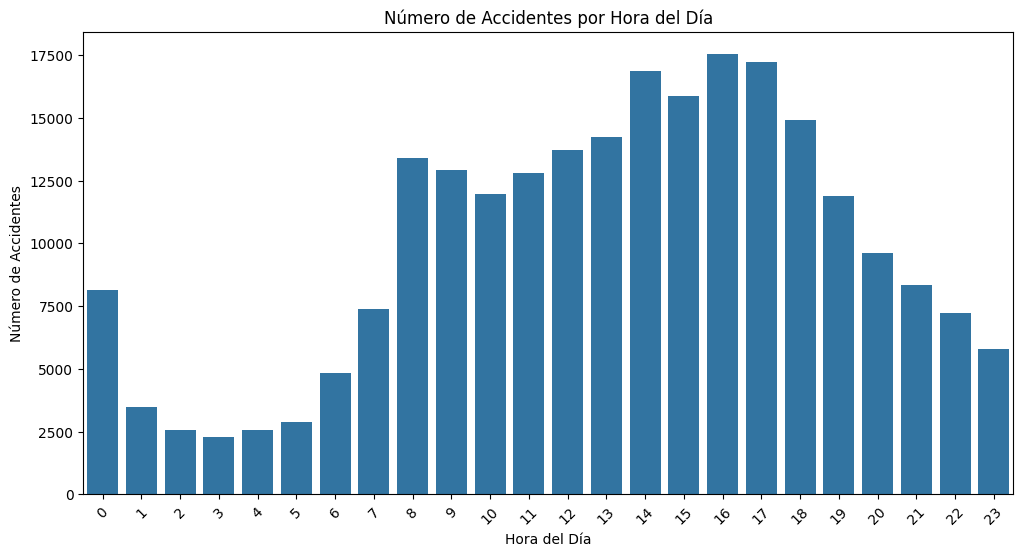

In [ ]:
# prompt: to create a graph bar indicating the amount of accidents pero our of the day

# Group by hour and count the number of accidents
accidentes_por_hora = df.groupby('HORA_SOLO')['COLLISION_ID'].count().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='HORA_SOLO', y='COLLISION_ID', data=accidentes_por_hora)
plt.title('Número de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks(rotation=45)
plt.show()


En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Respuesta.**
Consideramos que este enfoque es muy general, teniendo en cuenta que tanto los días de ocurrencia como los lugares son factores determinantes en el análisis para la detección de hallazgos que nos puedan llevar a tomar mejores decisiónes en cuando a la definición de acciones y estrategias para la mejora de la cantidad de accidentes.

### Ejercicio 4:

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

**Respuesta**
Podemos evidenciar que el número de accidentes durante los días hábiles es relativamente constante; sin embargo hay un leve incremento durante los días viernes, día que se puede establecer,hay mayor cantidad de vehículos circulando en las calles.

Durante el fin de semana, hay una disminución significativa de vehículos circulando y por tal razon una disminución en el número de accidentes.

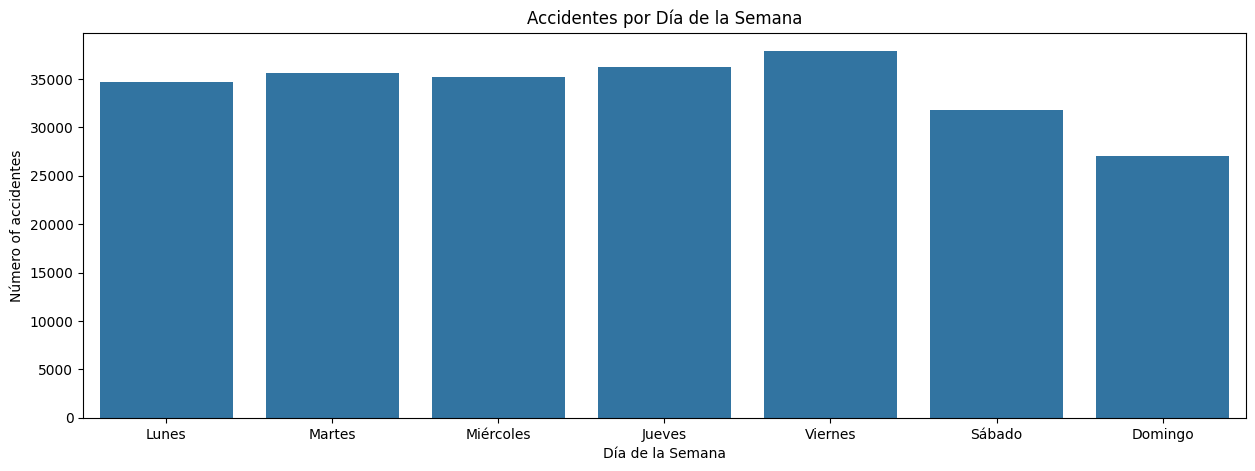

In [ ]:
# Solución propuesta
# Convertir la columna fecha en formato "datetime" para conocer el día de la semana
import pandas as pd
from pandas.api.types import CategoricalDtype

df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True, errors='coerce')

# Definir el día de la semana y asignar nombres
df['Día de la Semana'] = df['DATE'].dt.weekday
dias_semana = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves',
               4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
df['Día de la Semana'] = df['Día de la Semana'].map(dias_semana)

dias_ordenados = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
categoria_dias = CategoricalDtype(categories=dias_ordenados, ordered=True)
df['Día de la Semana'] = df['Día de la Semana'].astype(categoria_dias)

#Contar accidentes por día (lunes a domingo)
conteo_accidentes = df['Día de la Semana'].value_counts().sort_index()

# Generar gráfico (barras)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=conteo_accidentes.index, y=conteo_accidentes.values)

plt.xlabel("Día de la Semana")
plt.ylabel("Número of accidentes")
plt.title("Accidentes por Día de la Semana")
plt.show()

### Ejercicio 5:

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

**Respuesta** No existe una relación directa entre el número de accidentes y el área del municipio.

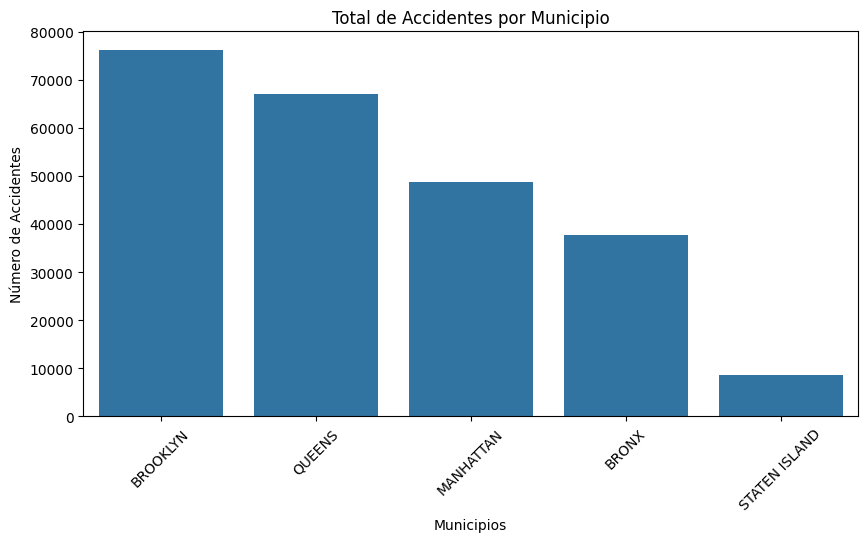

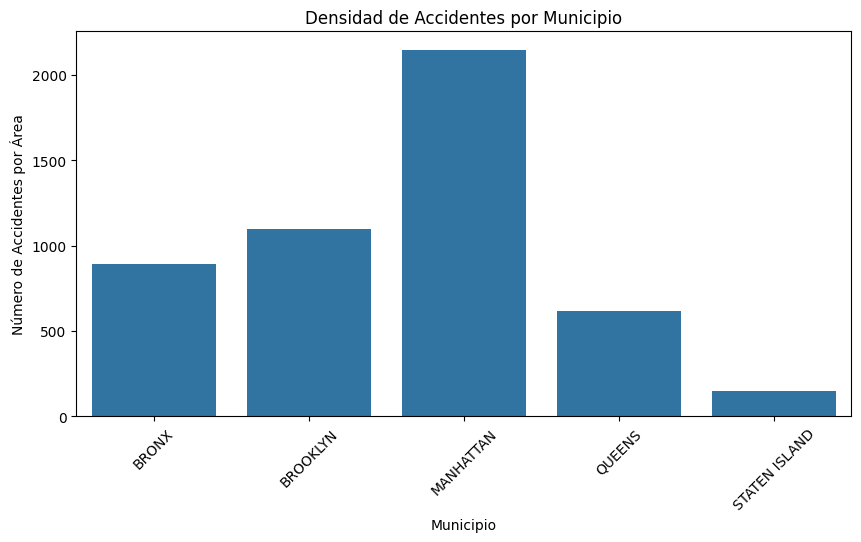

In [ ]:
# Solución propuesta

# Calcular el número de accidentes por municipio
Accidentes_por_Municipio = df['BOROUGH'].value_counts()

# Información de área por municipio
Área_Municipio = {
"BRONX": 42.2,
"BROOKLYN": 69.4,
"MANHATTAN": 22.7,
"QUEENS": 108.7,
"STATEN ISLAND": 57.5
}

# Calcular accidentes por área
Accidentes_por_Área = Accidentes_por_Municipio / pd.Series(Área_Municipio)

# Gráfico de accidentes por municipio
plt.figure(figsize=(10, 5))
sns.barplot(x=Accidentes_por_Municipio.index, y=Accidentes_por_Municipio.values)
plt.xlabel("Municipios")
plt.ylabel("Número de Accidentes")
plt.title("Total de Accidentes por Municipio")
plt.xticks(rotation=45)
plt.show()

# Gráfico de accidentes por área
plt.figure(figsize=(10, 5))
sns.barplot(x=Accidentes_por_Área.index, y=Accidentes_por_Área.values)
plt.xlabel("Municipio")
plt.ylabel("Número de Accidentes por Área")
plt.title("Densidad de Accidentes por Municipio")
plt.xticks(rotation=45)
plt.show()

Podemos ver que Brooklyn y Queens tienen un número muy alto de accidentes en relación con los otros tres condados. Pero, ¿qué tal por milla cuadrada?

**Respuesta** Se puede evidenciar como en el municipio de Manhattan al tener un área menor, presenta el mayor número de accidentes.

### Ejercicio 6:

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

**Respuesta** El gráfico nos permite evidenciar un comportamiento similar para todos los municipios frente al número de accidentes por hora del día.

<Figure size 1200x600 with 0 Axes>

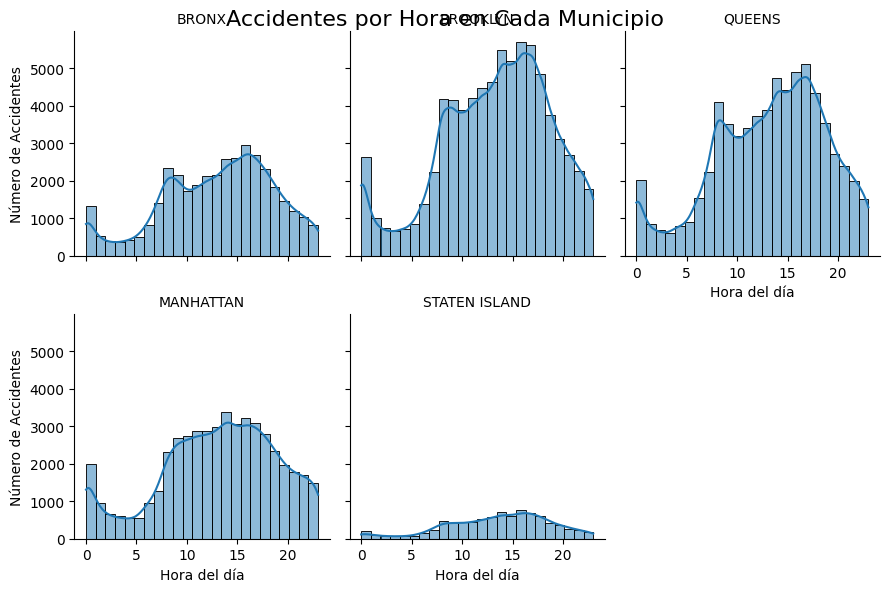

In [ ]:
# Solución propuesta

# Convertir la columna TIME a formato datetime para extraer la hora
df["HOUR"] = pd.to_datetime(df["TIME"], format="%H:%M").dt.hour

df_filtered = df[df["BOROUGH"].notna()]

plt.figure(figsize=(12, 6))
g = sns.FacetGrid(df_filtered, col="BOROUGH", col_wrap=3, sharex=True, sharey=True)
g.map(sns.histplot, "HOUR", bins=24, kde=True)
g.set_axis_labels("Hora del día", "Número de Accidentes")
g.set_titles("{col_name}")
plt.suptitle("Accidentes por Hora en Cada Municipio", fontsize=16)
plt.show()

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

**Respuesta. **

En los gráficos podemos evidenciar que el comportamiento es muy similar en lo que respecta a la tendencia de la cantidad de accidentes de tránsito por hora del día en los diferentes municipios.

Con respecto a la segunda parte de la pregunta, consideramos si el entorno a analizar es con estas variables, no se justificaría concentrarnos en diferentes momentos por cada municipio. Ahora bien, si sería necesaria incorporar otras variables para tener una mejor compresión de lo que esta sucediendo e identificar si se mantiene este comportamiento similar al sumar otras dimensiones.

### Ejercicio 7:

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

<ipython-input-70-136db1a359df>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factores_comunes.values, y=factores_comunes.index, palette="viridis")


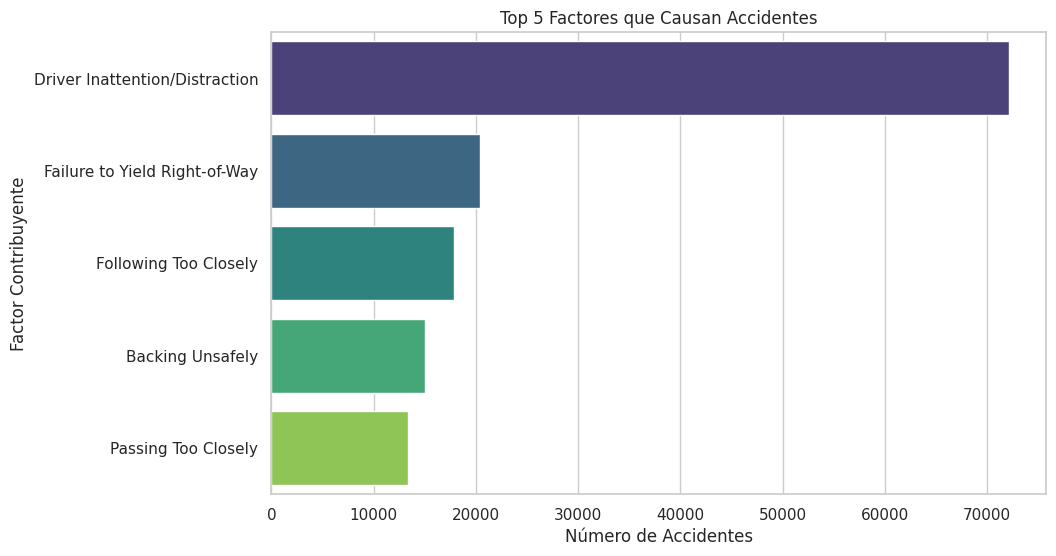

In [70]:
# Solución propuesta

# Ejercicio 7: Factores más comunes de accidentes
factores_cols = [f"CONTRIBUTING FACTOR VEHICLE {i}" for i in range(1, 6) if f"CONTRIBUTING FACTOR VEHICLE {i}" in df.columns]
factores = pd.concat([df[col] for col in factores_cols]).dropna()
factores = factores[factores != "Unspecified"]
factores_comunes = factores.value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=factores_comunes.values, y=factores_comunes.index, palette="viridis")
plt.xlabel("Número de Accidentes")
plt.ylabel("Factor Contribuyente")
plt.title("Top 5 Factores que Causan Accidentes")
plt.show()


Los 5 principales factores que contribuyen a los accidentes son:

*   Unspecified: 240,164 incidentes
*   Driver Inattention/Distraction: 72,203 incidentes
*   Failure to Yield Right-of-Way: 20,413 incidentes
*   Following Too Closely: 17,909 incidentes
*   Backing Unsafely: 15,068 incidentes






### Ejercicio 8:

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.


Los tipos de vehículos más involucrados en accidentes por municipio son:



<ipython-input-64-5c9bc5cd706d>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_vehiculos_por_municipio = top_vehiculos_por_municipio.groupby("BOROUGH", group_keys=False).apply(lambda x: x.nlargest(10, "count")).reset_index(drop=True)


<Figure size 1200x600 with 0 Axes>

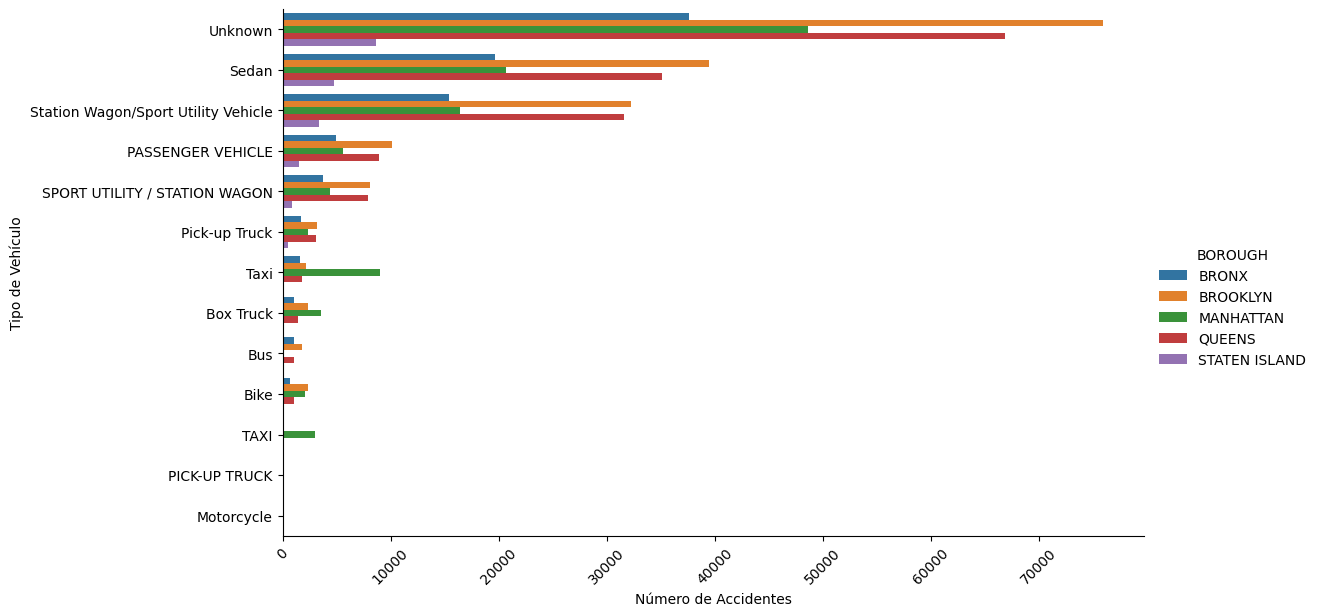

In [ ]:
# Solución propuesta
# Ejercicio 8: Tipos de vehículos más involucrados en accidentes por municipio (Top 10 por municipio)
vehiculos_cols = [f"VEHICLE TYPE CODE {i}" for i in range(1, 6) if f"VEHICLE TYPE CODE {i}" in df.columns]
vehiculos_municipio = df_filtered.melt(id_vars=["COLLISION_ID", "BOROUGH"], value_vars=vehiculos_cols, var_name="Vehiculo", value_name="Tipo").dropna()
vehiculos_municipio = vehiculos_municipio.drop_duplicates(subset=["COLLISION_ID", "Tipo", "BOROUGH"])

# Contar los tipos de vehículos por municipio y filtrar los 10 más comunes por municipio
top_vehiculos_por_municipio = vehiculos_municipio.groupby(["BOROUGH", "Tipo"]).size().reset_index(name="count")
top_vehiculos_por_municipio = top_vehiculos_por_municipio.groupby("BOROUGH", group_keys=False).apply(lambda x: x.nlargest(10, "count")).reset_index(drop=True)


plt.figure(figsize=(12, 6))
g = sns.catplot(data=top_vehiculos_por_municipio, x="count", y="Tipo", hue="BOROUGH", kind="bar", height=6, aspect=2)
g.set_axis_labels("Número de Accidentes", "Tipo de Vehículo")
g.set_titles("Top 10 Tipos de Vehículos más Involucrados en Accidentes por Municipio")
plt.xticks(rotation=45)
plt.show()


### Ejercicio 9:

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [ ] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Dé una recomendación para visitar estas áreas para estudiar más el problema.   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. Haría lo siguiente: *aquí tu respuesta recomendada*.

 Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.


<ipython-input-72-ffb09f65b202>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=factores_pyc_comunes_2019.values, y=factores_pyc_comunes_2019.index, palette="rocket")


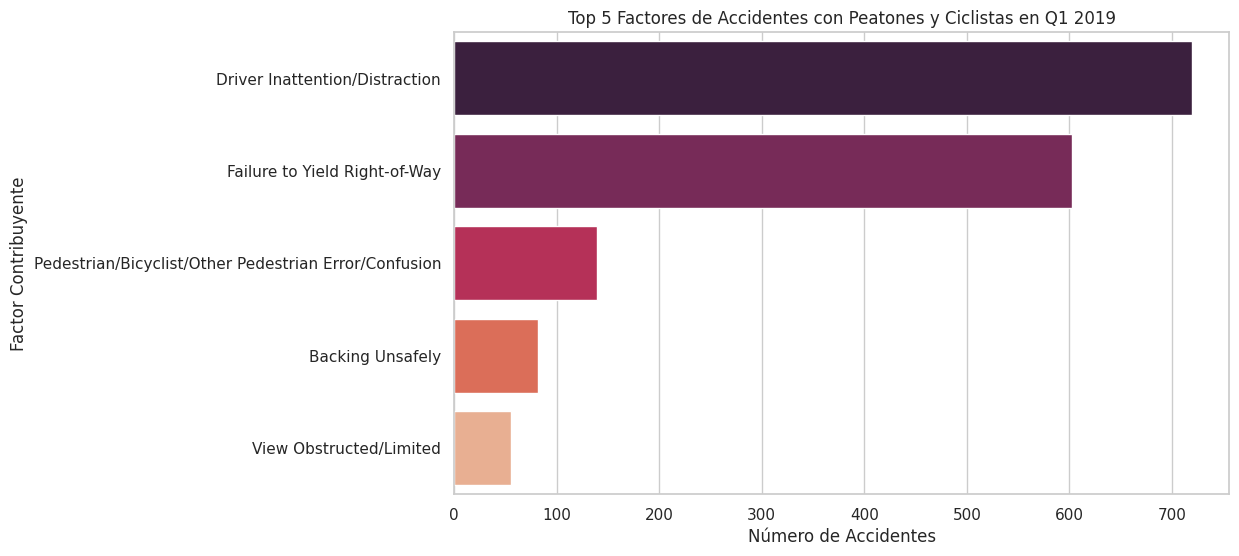

In [72]:
df_q1_2019_pyc = df[(df["DATE"] >= "2019-01-01") & (df["DATE"] <= "2019-03-31") &
                    ((df["NUMBER OF PEDESTRIANS INJURED"] > 0) |
                     (df["NUMBER OF CYCLIST INJURED"] > 0) |
                     (df["NUMBER OF PEDESTRIANS KILLED"] > 0) |
                     (df["NUMBER OF CYCLIST KILLED"] > 0))]

# Filtrar para excluir factores 'Unspecified'

factores_pyc_2019 = pd.concat([df_q1_2019_pyc[col] for col in factores_cols]).dropna()
factores_pyc_2019 = factores_pyc_2019[factores_pyc_2019 != 'Unspecified']
factores_pyc_comunes_2019 = factores_pyc_2019.value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=factores_pyc_comunes_2019.values, y=factores_pyc_comunes_2019.index, palette="rocket")
plt.xlabel("Número de Accidentes")
plt.ylabel("Factor Contribuyente")
plt.title("Top 5 Factores de Accidentes con Peatones y Ciclistas en Q1 2019")
plt.show()

Factores más comunes en accidentes con peatones y ciclistas en Q1 2019
De acuerdo con los datos, las cinco principales causas de accidentes en los que estuvieron involucrados peatones y ciclistas en el primer trimestre de 2019 son:

Unspecified (958 casos) → No se especificó una causa clara en muchos registros.


*   Driver Inattention/Distraction (707 casos) → Distracción del conductor.
*   Failure to Yield Right-of-Way (595 casos) → No ceder el derecho de paso.
*   Pedestrian/Bicyclist/Other Pedestrian Error/Confusion (137 casos) → Error o confusión del peatón/ciclista.
*   Backing Unsafely (77 casos) → Retroceso inseguro.

Recomendaciones:
Acciones inmediatas en zonas críticas:

Instalar más señales y semáforos en cruces peligrosos.
Aumentar la supervision en áreas donde no se respeta el derecho de paso de peatones y ciclistas.
Revisar si la infraestructura peatonal y ciclista es adecuada en las áreas de alta incidencia.
Concientización y educación vial:

Lanzar campañas para reducir la distracción del conductor (uso de celulares mientras conducen).
Educar a peatones y ciclistas sobre cómo evitar situaciones de riesgo, especialmente en intersecciones.

Mejorar la recolección de datos:
Más del 30% de los casos no especificaron una causa. Es importante mejorar los registros para entender mejor las causas de los accidentes y tomar medidas más efectivas.


### Ejercicio 10:

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

<ipython-input-36-4a482524270b>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehiculos_muertes["TOTAL_DEATHS"], y=vehiculos_muertes["Tipo"], palette="magma")


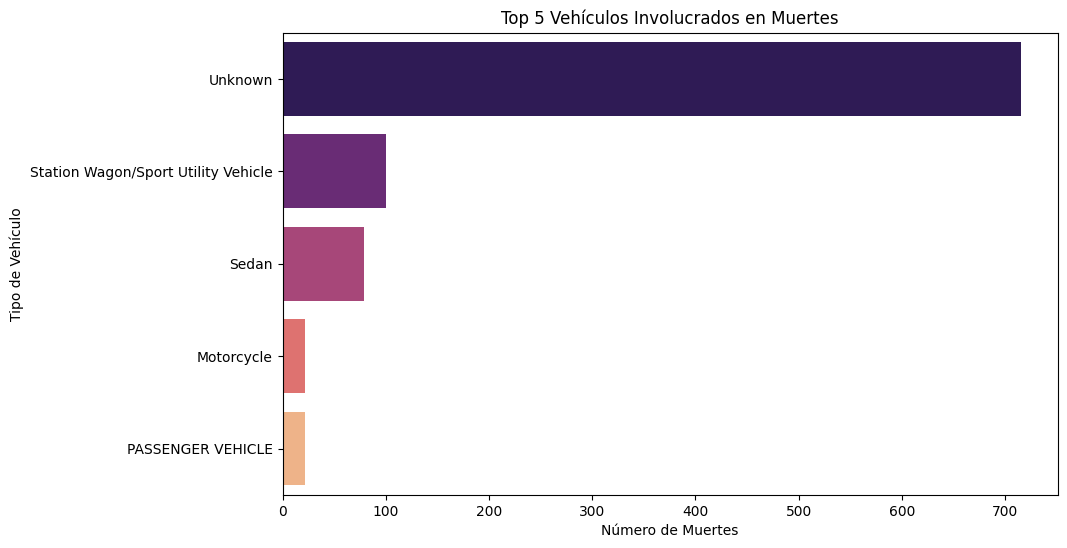

In [ ]:
# Solución propuesta
# Ejercicio 10: Tipos de vehículos más involucrados en muertes
muertes_cols = ["NUMBER OF PEDESTRIANS KILLED", "NUMBER OF CYCLIST KILLED", "NUMBER OF MOTORIST KILLED"]

df[muertes_cols] = df[muertes_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df["TOTAL_DEATHS"] = df[muertes_cols].sum(axis=1)

vehiculos_cols = [col for col in df.columns if "VEHICLE TYPE CODE" in col]
vehiculos_muertes = df.melt(id_vars=["TOTAL_DEATHS"], value_vars=vehiculos_cols, var_name="Vehiculo", value_name="Tipo").dropna()
vehiculos_muertes = vehiculos_muertes.groupby("Tipo")["TOTAL_DEATHS"].sum().reset_index()
vehiculos_muertes = vehiculos_muertes.sort_values(by="TOTAL_DEATHS", ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=vehiculos_muertes["TOTAL_DEATHS"], y=vehiculos_muertes["Tipo"], palette="magma")
plt.xlabel("Número de Muertes")
plt.ylabel("Tipo de Vehículo")
plt.title("Top 5 Vehículos Involucrados en Muertes")
plt.show()